# SC1015 Mini-Project

Group: 2, FCEE

Lee Heng Sheng Brandon, U2322900C \
Alan Lee Leman, U2321753B \
Wee Zi Hao, U2323380H

### Final Attribute Information

1. `age`: age in years (Numerical)
2. `sex`: 0 = female; 1 = male (Categorical)
3. `cp` changed to `chest_pain`: Chest pain type (4 values) (Categorical)
4. `trestbps` changed to `blood_pressure`: Resting blood pressure (in mm Hg on admission to the hospital) (Numerical)
5. `chol` changed to `cholesterol`: Serum cholesterol in mg/dl (serum cholestoral in mg/dl) (Numerical)
6. `fbs` changed to `fasting_blood_sugar`: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) (Categorical)
7. `restecg` changed to `resting_ecg_result`: Resting electrocardiographic results (values 0,1,2) (Categorical)
8. `thalach` changed to `max_heart_rate`: Maximum heart rate achieved (in bpm) (Numerical)
9. `exang` changed to `exercise_induced_angina`: Exercise induced angina (0 = no; 1 = yes) (Categorical)
10. `oldpeak` changed to `st_depression`: ST depression induced by exercise relative to rest (Numerical)
11. `new_st_depression`: The presence of ST depression induced by exercise relative to rest (0 = no; 1 = yes) (Categorical)
12. `slope`: The slope of the peak exercise ST segment (0, 1, 2) (Categorical)
13. `ca` changed to `num_affected_vessels`: Number of major vessels (0-3) colored by fluoroscopy (Categorical)
14. `thal` changed to `defect_type`: 1 = normal; 2 = fixed defect; 3 = reversable defect (Categorical)
15. `target` changed to `heart_disease`: 0 = no heart disease; 1 = heart disease (Categorical)
16. `exercise_problem`: 0 = no exercise problem; 1 = exercise problem (Categorical)

### Essential Libraries

Let us begin by importing the essential Python Libraries for our Decision Tree Modeling

> NumPy : Library for Numeric Computations in Python \
Pandas : Library for Data Acquisition and Preparation \
Matplotlib : Low-level library for Data Visualization \
Seaborn : Higher-level library for Data Visualization 

In [35]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

### Import the Dataset

We will be importing our clean_data.csv dataset that we previously saved.\
Dataset is a cleaned version of [Heart Disease](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset). By David Lapp. 


In [36]:
# Importing our dataset
clean_data = pd.read_csv("datasets\clean_data2.csv")

print("Data dimensions:", clean_data.shape)

clean_data

Data dimensions: (1000, 16)


,age,sex,chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,new_st_depression,slope,num_affected_vessels,defect_type,exercise_problem,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,1,2,2,3,0,0
1,53,1,0,140,203,1,0,155,1,3.1,1,0,0,3,0,0
2,70,1,0,145,174,0,1,125,1,2.6,1,0,0,3,0,0
3,61,1,0,148,203,0,1,161,0,0.0,0,2,1,3,0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,1,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,1,1,140,221,0,1,164,1,0.0,0,2,0,2,0,1
996,60,1,0,125,258,0,0,141,1,2.8,1,1,1,3,1,0
997,47,1,0,110,275,0,0,118,1,1.0,1,1,1,2,1,0
998,50,0,0,110,254,0,0,159,0,0.0,0,2,0,2,0,1


In [37]:
# Make a list of numerical and categorical variables
cat_var = ["sex", "chest_pain", "fasting_blood_sugar", "resting_ecg_result", "exercise_induced_angina", "new_st_depression", 
           "slope", "num_affected_vessels", "defect_type", "heart_disease", "exercise_problem"]
num_var = [var for var in clean_data.columns if var not in cat_var]

## Encoding

### One Hot Encoding

Similar to decision tree, we shall be using sklearn's preprocessing `OneHotEncoding` to encode our categorical variables nominally by converting them into a set of binary (dummy) variables before fitting them into the model. 

Unlike logistic regression which assumes the absence of multicollinearity in data, random forests do not require this assumption, as they do not assume a particular relationship between the independent variables, in contrast to linear models. Because of this, we do not have to drop any of our encoded dummy variables from the dataset. 

### Label Encoding

While one-hot encoding can be powerful, it has several limitations. One-hot encoding is good for categorical features that are nominal, but not ordinal. Ordinal data consist of natural categories that are ordered. 

For example, a feature like `slope` with values 0-2 would have a natural degree of order, where upsloping = 0, flat = 1 and downsloping = 2. A normal st segment during exercise slopes sharply upwards (Hill & Timmis, 2002), and a flat slope would not be a good indicator, and a downward slope an even worse indicator. The classes in slope have a natural degree of order (severity of condition) which is indicated by the value of their magnitudes. On the other hand, a nominal feature like `sex` with values 0/1 that only indicate the gender of the patient has no natural ordering. 

We could explore using label encoding for our ordinal features and one-hot encoding for our nominal features. First, let us identify which categorical variables are nominal or ordinal.

In [38]:
print(cat_var)

['sex', 'chest_pain', 'fasting_blood_sugar', 'resting_ecg_result', 'exercise_induced_angina', 'new_st_depression', 'slope', 'num_affected_vessels', 'defect_type', 'heart_disease', 'exercise_problem']


`slope` and `num_affected_vessels` are the only ordinal features. 

Note that features such as `chest_pain` and `resting_ecg_result` are nominal because their values do not represent a degree of order (such as severity of condition) and only represent the different types of chest pain and ecg results.

chest_pain:

- Typicalangina = 1 
- Atypicalangina = 2 
- Non-anginal pain = 3 
- Asymptomatic = 4

resting_ecg_result: 

- Normal = 0
- Left ventricular hypertrophy = 1
- ST-T wave abnormality = 2

Because `slope` and `num_affected_vessels` are already label encoded (from 0/1-n), we simply exclude them when doing one-hot encoding. 

In [39]:
from sklearn.preprocessing import OneHotEncoder

# Initialise OneHotEncoder object.
ohe = OneHotEncoder()

# One-Hot Encoding of categorical predictors
cat_pred = clean_data[cat_var].drop(["slope", "num_affected_vessels", "heart_disease"], axis = 1)
ohe.fit(cat_pred)

cat_pred_ohe = pd.DataFrame(ohe.transform(cat_pred).toarray(), 
             columns = ohe.get_feature_names_out(cat_pred.columns))

# Check the encoded variables
cat_pred_ohe.info()

# Concatenate with the numeric variables
clean_data_encoded = pd.concat([clean_data[num_var], cat_pred_ohe, 
                            clean_data[["slope", "num_affected_vessels", "heart_disease"]]], axis = 1)

clean_data_encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex_0                      1000 non-null   float64
 1   sex_1                      1000 non-null   float64
 2   chest_pain_0               1000 non-null   float64
 3   chest_pain_1               1000 non-null   float64
 4   chest_pain_2               1000 non-null   float64
 5   chest_pain_3               1000 non-null   float64
 6   fasting_blood_sugar_0      1000 non-null   float64
 7   fasting_blood_sugar_1      1000 non-null   float64
 8   resting_ecg_result_0       1000 non-null   float64
 9   resting_ecg_result_1       1000 non-null   float64
 10  resting_ecg_result_2       1000 non-null   float64
 11  exercise_induced_angina_0  1000 non-null   float64
 12  exercise_induced_angina_1  1000 non-null   float64
 13  new_st_depression_0        1000 non-null   float6

,age,blood_pressure,cholesterol,max_heart_rate,st_depression,sex_0,sex_1,chest_pain_0,chest_pain_1,chest_pain_2,...,new_st_depression_0,new_st_depression_1,defect_type_1,defect_type_2,defect_type_3,exercise_problem_0,exercise_problem_1,slope,num_affected_vessels,heart_disease
0,52,125,212,168,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2,2,0
1,53,140,203,155,3.1,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0,0
2,70,145,174,125,2.6,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0,0
3,61,148,203,161,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2,1,0
4,62,138,294,106,1.9,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,140,221,164,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2,0,1
996,60,125,258,141,2.8,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1,1,0
997,47,110,275,118,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,1,0
998,50,110,254,159,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2,0,1


### Splitting our dataset

We will be utilising the train_test_split function to split our data into our desired 80:20 ratio 

In [40]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(clean_data_encoded['heart_disease'])
X = pd.DataFrame(clean_data_encoded.drop('heart_disease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 18)

### Decision Tree Modeling

We will be using a decision tree as our initial model to test our hypothesis

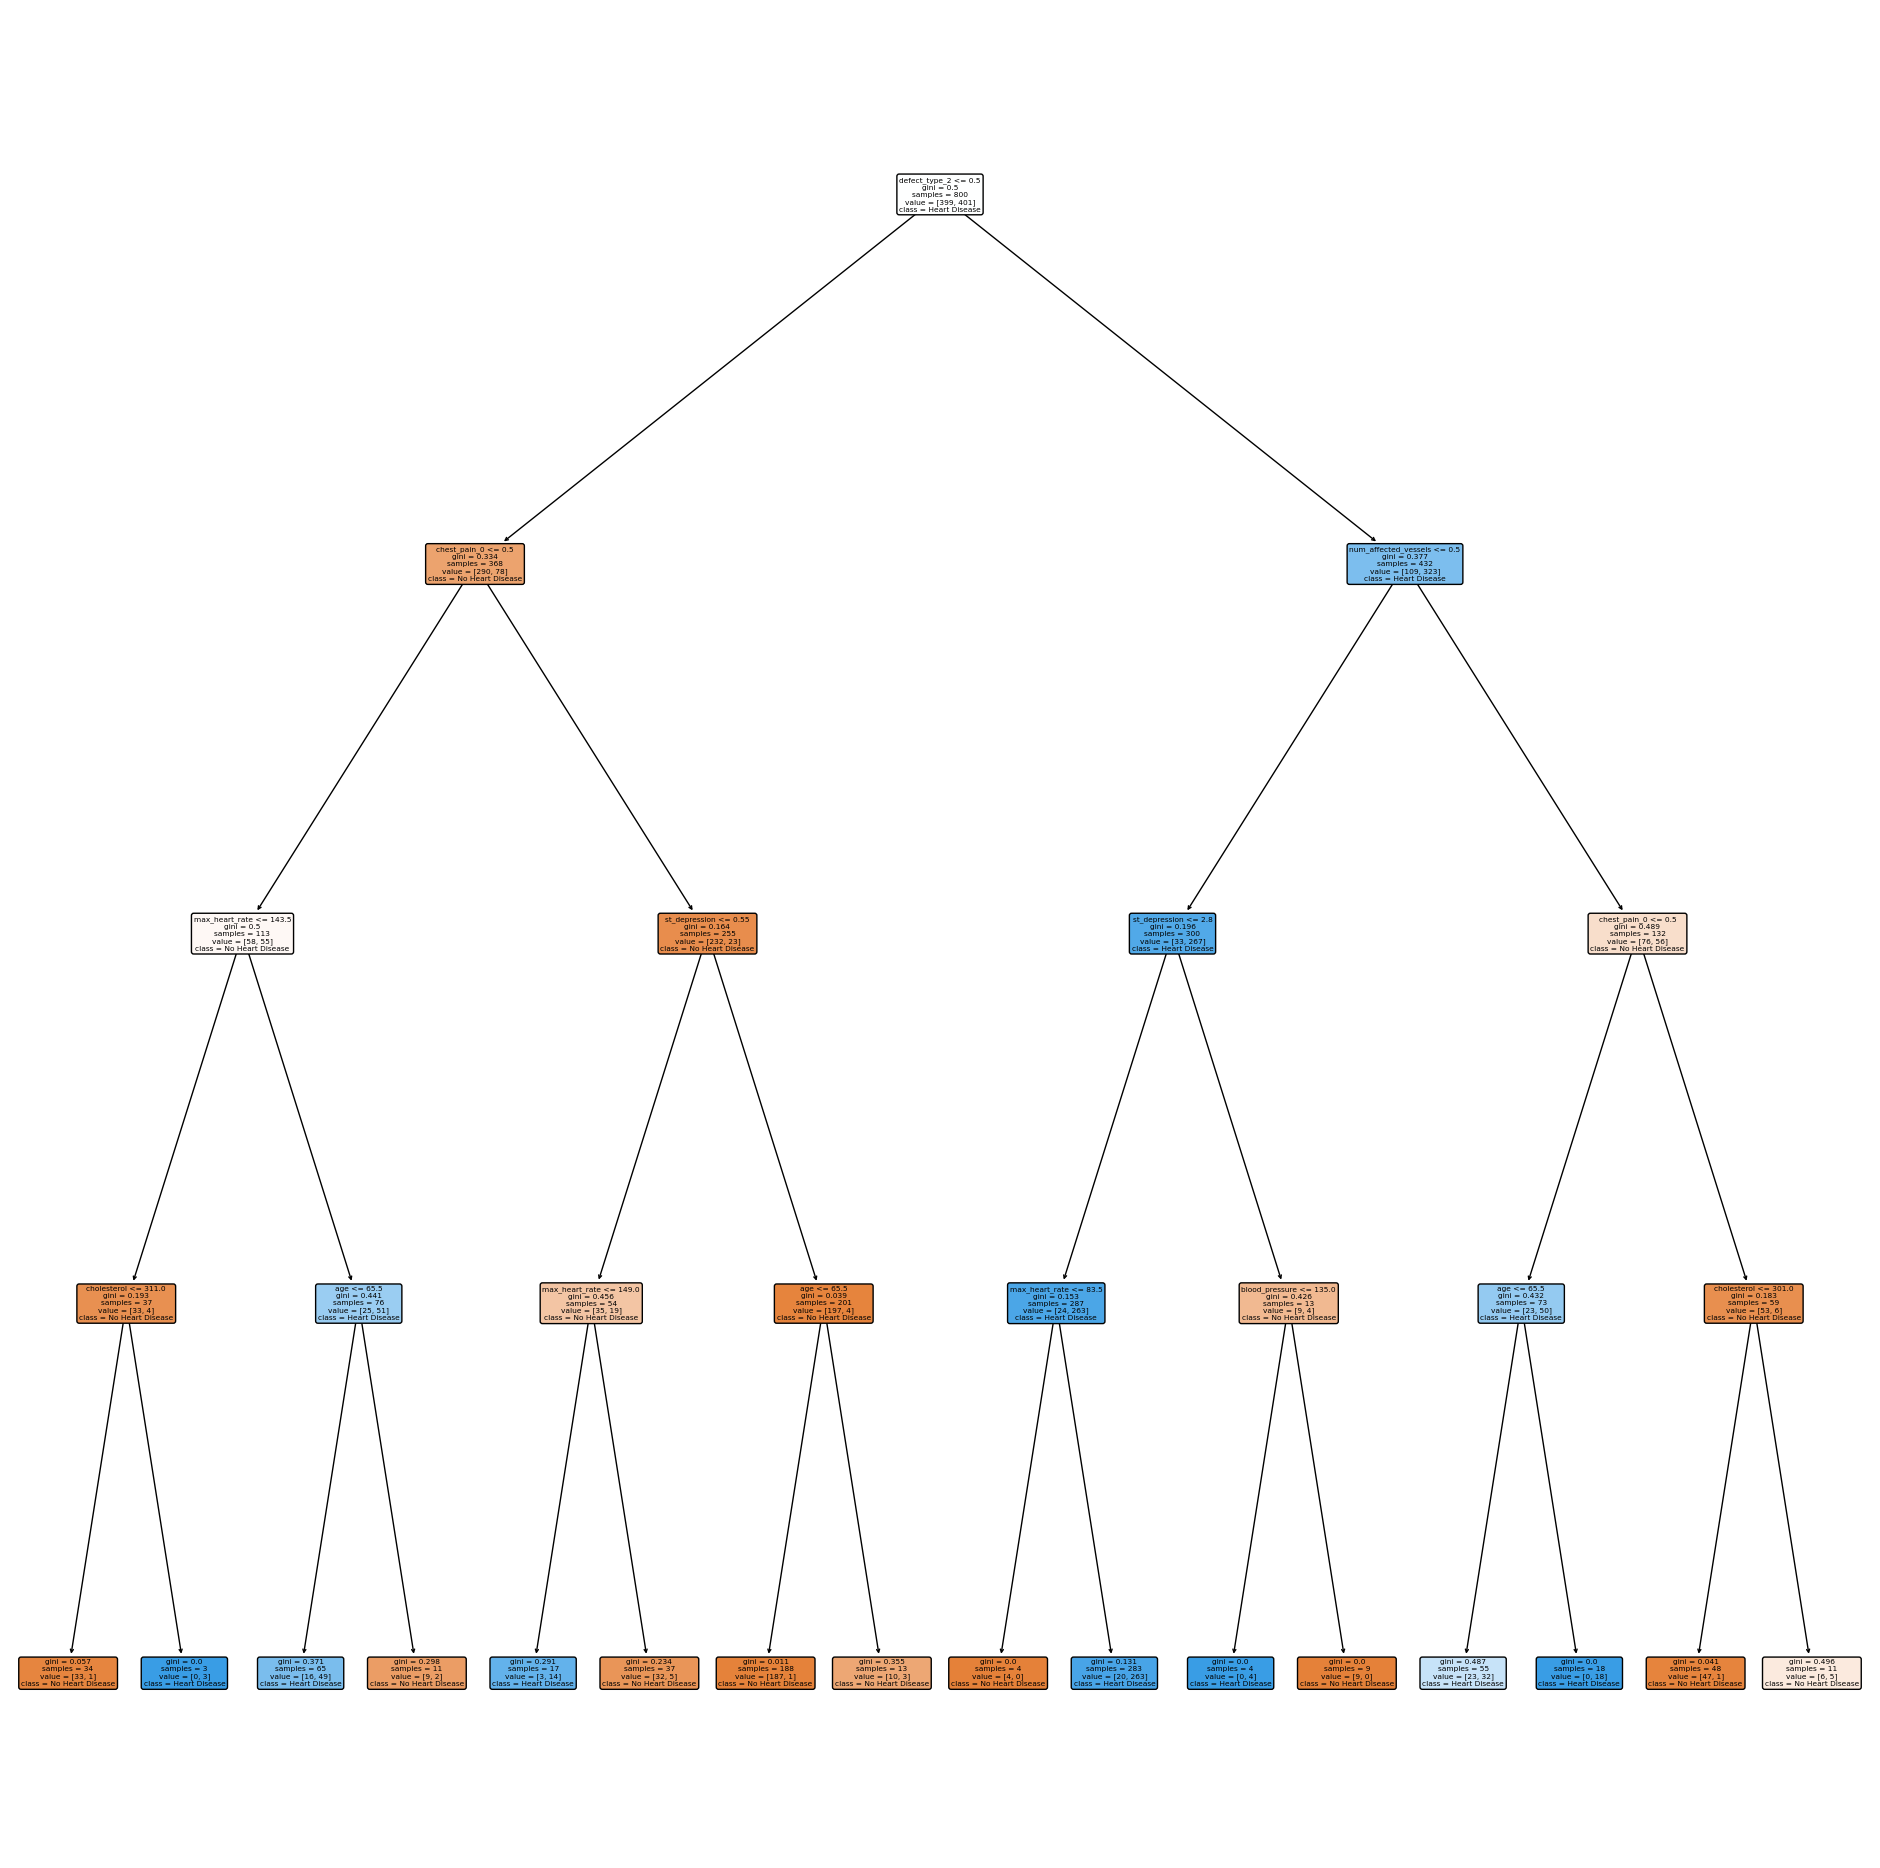

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dectree = DecisionTreeClassifier(max_depth = 4, random_state = 42)
dectree.fit(X_train, y_train)  
f = plt.figure(figsize = (24, 24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names = X_train.columns.tolist(), 
          class_names = ["No Heart Disease", "Heart Disease"]);

### Check the accuracy of the Model

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

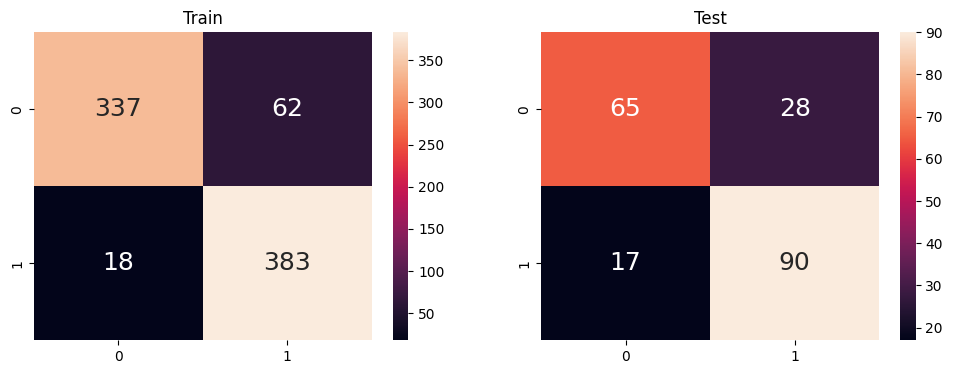

In [42]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict target with model
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Define a function to visualise confusion matrix
def viz_cmatrix(y_train, y_train_pred, y_test, y_test_pred):
    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))

    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

    axes[0].set_title("Train")
    axes[1].set_title("Test")
    
viz_cmatrix(y_train, y_train_pred, y_test, y_test_pred)

In [43]:
# Define a function to print rate metrics
def printMetrics(true, pred): 
    FP = confusion_matrix(true, pred)[0][1]
    FN = confusion_matrix(true, pred)[1][0]
    TP = confusion_matrix(true, pred)[1][1]
    TN = confusion_matrix(true, pred)[0][0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TNR = TN / (TN + FP)
    FNR = FN / (FN + TP)
    ca = (TN+TP)/(FN+TP+TN+FP)
    print("Classification Accuracy\t", ca)
    print("TPR:\t", TPR)
    print("FPR:\t", FPR)
    print("TNR:\t", TNR)
    print("FNR:\t", FNR)
    print()

print("TRAIN SET:")
printMetrics(y_train, y_train_pred)

print("TEST SET:")
printMetrics(y_test, y_test_pred)

TRAIN SET:
Classification Accuracy	 0.9
TPR:	 0.9551122194513716
FPR:	 0.15538847117794485
TNR:	 0.8446115288220551
FNR:	 0.04488778054862843

TEST SET:
Classification Accuracy	 0.775
TPR:	 0.8411214953271028
FPR:	 0.3010752688172043
TNR:	 0.6989247311827957
FNR:	 0.1588785046728972



## Hyperparameter Tuning: GridSearchCV
Model parameters are the weights and coefficients that the model's algorithm extracts from the data. On the other hand, hyperparameters are adjustable parameters that can be used to control the model's learning, such as the maximum depth for a decision tree. Hyperparameter optimisation is the tuning of these parameters to optimise the model's performance.

We shall use `GridSearchCV` from `sklearn` library to perform hyperparameter tuning. GridSearch performs an exhaustive searching over combinations of parameters and measures them against a specified score.

In addition, `GridSearchCV` also performs K-Fold cross validation. K-Fold cross validation is a technique for evaluating predictive models. The dataset is divided into k subsets or folds, and the model is trained and evaluated k times, using k - 1 folds for training and the last fold for testing each time. In every iteration, a different fold is used as the validation set. Performance metrics from each fold are averaged to estimate the model’s generalization performance. This allows us to train and test our model on the entire given dataset. It also allows us to assess our model's performance more accurately while preventing overfitting of our data.

The number of folds (k) is determined by the `cv` parameter in `GridSearchCV()`. Generally, the choice of k depends on the dataset size and desired bias-variance trade-off. Typical values are k = 5, k = 10 and k = 20. A larger k value can also result in longer computational times (k-folds cross validation has a time complexity of O(kN).

From *An Introduction to Statistical Learning* (2013, p. 184),

> To summarize, there is a bias-variance trade-off associated with the choice of k in k-fold cross-validation. Typically, given these considerations, one performs k-fold cross-validation using k = 5 or k = 10, as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance.

We shall choose a k value of 10. 

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import FitFailedWarning
import warnings

# Split the data into predictors and response
X = clean_data_encoded.drop(["heart_disease"], axis = 1)
y = clean_data_encoded["heart_disease"]

# First we determine max depth of DecisionTreeClassifier to find its range
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train) 
maximum = dectree.tree_.max_depth
print("maximum depth of tree:", maximum)

# Create dictionary of parameters, in this case we only use 1 parameter, depth.
param_grid = {"max_depth" : list(range(maximum + 1))}

with warnings.catch_warnings():
    # Ignore fitfailed warnings
    warnings.filterwarnings("ignore", category = FitFailedWarning)
    
    # We want to optimise for accuracy
    new_dec_tree = GridSearchCV(DecisionTreeClassifier(random_state = 42),
                                param_grid = param_grid,
                                cv = 5,
                                scoring = "accuracy", 
                                error_score = 0)

new_dec_tree.fit(X_train, y_train)

print("Best estimator:", new_dec_tree.best_estimator_)
print()
print("Best parameters:", new_dec_tree.best_params_)
print()
print("Best score:", new_dec_tree.best_score_)

maximum depth of tree: 9
Best estimator: DecisionTreeClassifier(max_depth=9, random_state=42)

Best parameters: {'max_depth': 9}

Best score: 0.9775


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 

Text(0, 0.5, 'k-fold_Mean_test_score')

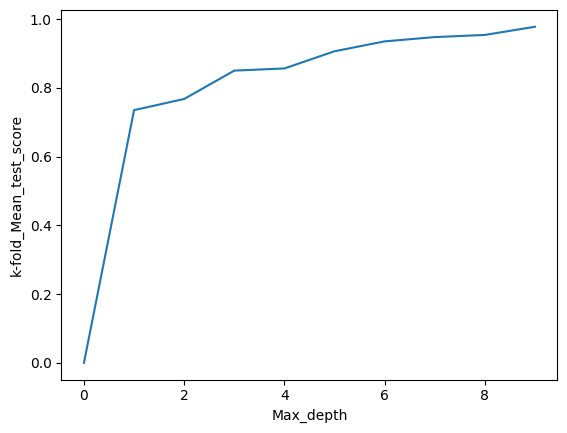

In [45]:
# We can plot the mean test_scores of k-fold cross validation against max_depth
x = param_grid["max_depth"]
y = new_dec_tree.cv_results_["mean_test_score"]

plt.plot(x, y)
plt.xlabel("Max_depth")
plt.ylabel("k-fold_Mean_test_score")

### Optimised Model

It appears the best estimator that GridSearchCV found was `DecisionTreeClassifier(max_depth=9, random_state=42)`. 

We shall check the accuracy again based on these parameters. 

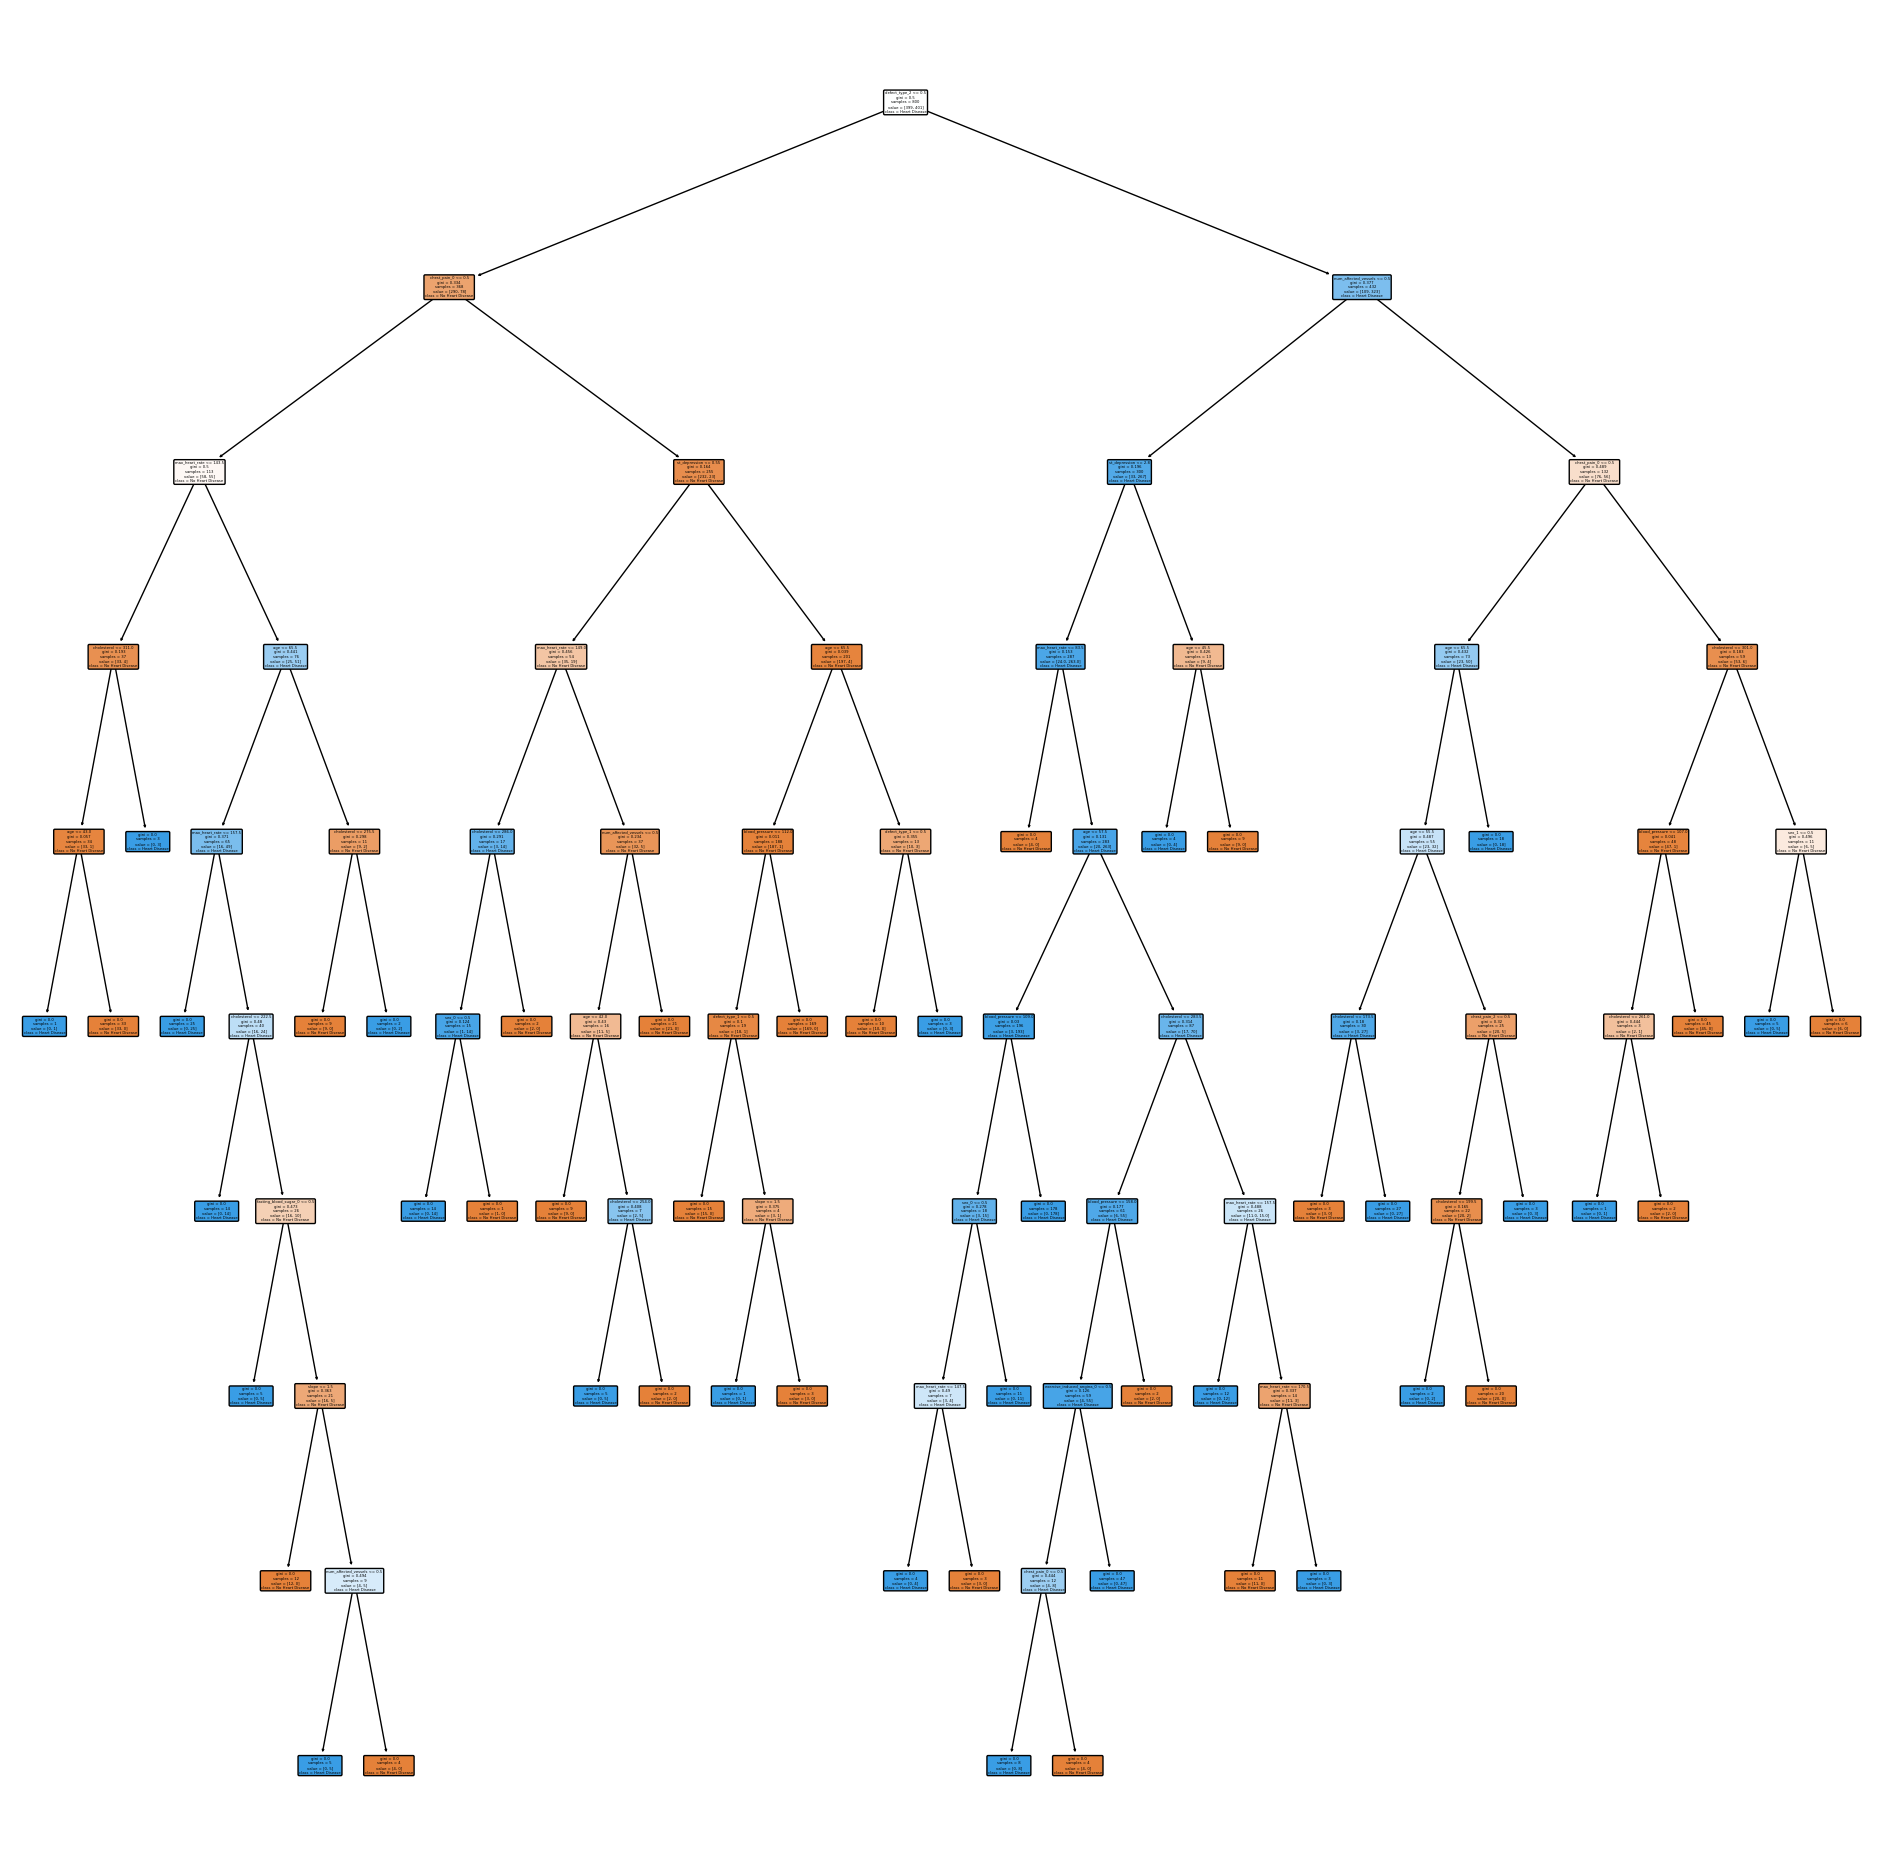

In [46]:
dectree = DecisionTreeClassifier(max_depth = 9, random_state = 42)
dectree.fit(X_train, y_train)  
f = plt.figure(figsize = (24, 24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names = X_train.columns.tolist(), 
          class_names = ["No Heart Disease", "Heart Disease"]);

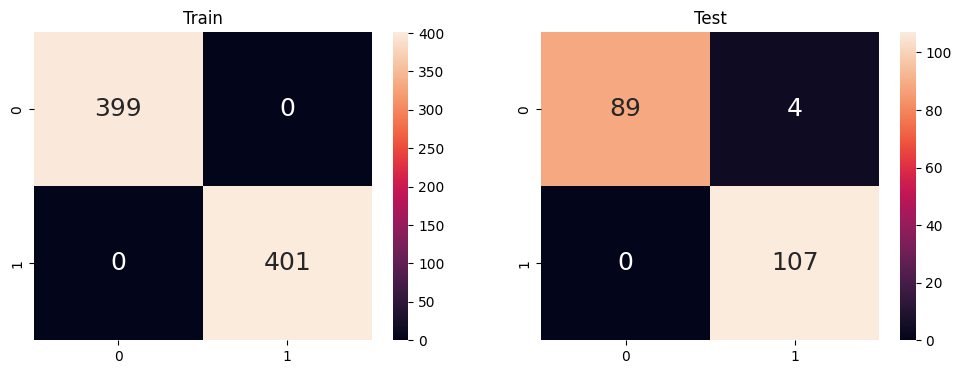

In [47]:
# Predict target with model
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

viz_cmatrix(y_train, y_train_pred, y_test, y_test_pred)

In [48]:
print("TRAIN SET:")
printMetrics(y_train, y_train_pred)

print("TEST SET:")
printMetrics(y_test, y_test_pred)

TRAIN SET:
Classification Accuracy	 1.0
TPR:	 1.0
FPR:	 0.0
TNR:	 1.0
FNR:	 0.0

TEST SET:
Classification Accuracy	 0.98
TPR:	 1.0
FPR:	 0.043010752688172046
TNR:	 0.956989247311828
FNR:	 0.0



### Findings

As expected, our optimised model performs the better on the train data, with the highest classification accuracy of 1.0. Furthermore, our new model with optimal max_depth = 9 outperforms our old model max_depth = 4 (0.98 > 0.775) on the test data in terms of classification accuracy.

## Feature Importance

Ranking the features according to how much they contribute to the final predictions can be achieved by using feature importance. Scikit has a built in attribute within the DecisionTreeClassifier class for this. 

In [49]:
importances = dectree.feature_importances_
print(dectree.feature_names_in_)

['age' 'blood_pressure' 'cholesterol' 'max_heart_rate' 'st_depression'
 'sex_0' 'sex_1' 'chest_pain_0' 'chest_pain_1' 'chest_pain_2'
 'chest_pain_3' 'fasting_blood_sugar_0' 'fasting_blood_sugar_1'
 'resting_ecg_result_0' 'resting_ecg_result_1' 'resting_ecg_result_2'
 'exercise_induced_angina_0' 'exercise_induced_angina_1'
 'new_st_depression_0' 'new_st_depression_1' 'defect_type_1'
 'defect_type_2' 'defect_type_3' 'exercise_problem_0' 'exercise_problem_1'
 'slope' 'num_affected_vessels']


Here, we plot the mean decrease in impurity of each variable. Node impurity measures how well the data in split in a node. In our case, a very impure node indicates that we are unable to accurately predict if a patient has heart disease using the variables up to that node. Mean decrease in impurity measures the decrease in node impurity from a parent node to a child node, indicating that it is a more important variable in predicting heart disease.

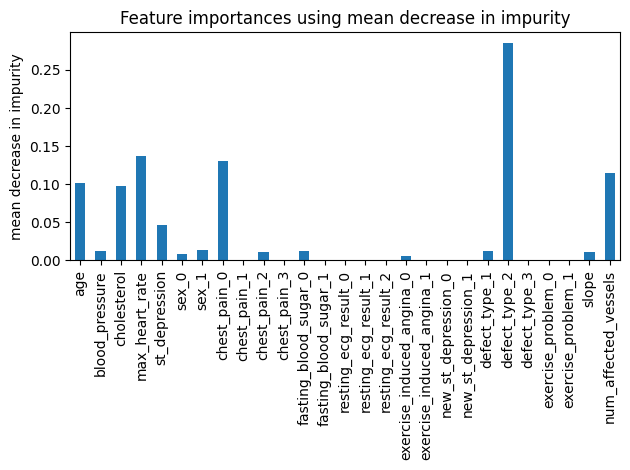

In [50]:
dec_importances = pd.Series(importances, index = dectree.feature_names_in_)

fig, ax = plt.subplots()
dec_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using mean decrease in impurity")
ax.set_ylabel("mean decrease in impurity")
fig.tight_layout()

## Conclusion

As we can see, `defect_type_2` (fixed defect), `num_affected_vessels` (vessels coloured by fluoroscopy) and `chest_pain_0` (type of chest pain) were the best predictors in heart disease, while predictors such as `fasting_blood_sugar_1`(whether they had fasting blood sugar > 120 mg/dl) and `resting_ecg_result` were poor predictors in seeing if a patient had heart disease